<a href="https://colab.research.google.com/github/Azmain173/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#/content/train.csv
import numpy as np
import pandas as pd

In [35]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [37]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/train.csv")

# Identify feature types
continuous_features = df.select_dtypes(include=['float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)
print("Numerical (Discrete) Features:", numerical_features)


Continuous Features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical Features: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
Numerical (Discrete) Features: []


In [38]:
print(df.isnull().sum())#check for missing values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [39]:
#For Continuous & Numerical Features: Use mean/median imputation.
df["Age"].fillna(df["Age"].median(), inplace=True)
df["RoomService"].fillna(df["RoomService"].median(), inplace=True)
df["FoodCourt"].fillna(df["FoodCourt"].median(), inplace=True)
df["ShoppingMall"].fillna(df["ShoppingMall"].median(), inplace=True)
df["Spa"].fillna(df["Spa"].median(), inplace=True)
df["VRDeck"].fillna(df["VRDeck"].median(), inplace=True)

<ipython-input-39-e5c15cc8bc91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-39-e5c15cc8bc91>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [40]:
#For Categorical Features: Use mode (most frequent value) or 'Unknown'
df["HomePlanet"].fillna("Unknown", inplace=True)
df["CryoSleep"].fillna("Unknown", inplace=True)
df["Cabin"].fillna("Unknown", inplace=True)
df["Destination"].fillna("Unknown", inplace=True)
df["VIP"].fillna("Unknown", inplace=True)
df["Name"].fillna("Unknown", inplace=True)

<ipython-input-40-18217785671c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["HomePlanet"].fillna("Unknown", inplace=True)
<ipython-input-40-18217785671c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [41]:
# Check unique values for categorical columns:
for col in categorical_features:
    print(f"{col}: {df[col].unique()[:10]}")  # Show first 10 unique values

PassengerId: ['0001_01' '0002_01' '0003_01' '0003_02' '0004_01' '0005_01' '0006_01'
 '0006_02' '0007_01' '0008_01']
HomePlanet: ['Europa' 'Earth' 'Mars' 'Unknown']
CryoSleep: [False True 'Unknown']
Cabin: ['B/0/P' 'F/0/S' 'A/0/S' 'F/1/S' 'F/0/P' 'F/2/S' 'G/0/S' 'F/3/S' 'B/1/P'
 'F/1/P']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'Unknown']
VIP: [False True 'Unknown']
Name: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' 'Solam Susent'
 'Willy Santantines' 'Sandie Hinetthews' 'Billex Jacostaffey'
 'Candra Jacostaffey' 'Andona Beston' 'Erraiam Flatic']


"""
Action: If a categorical feature has too many unique values, consider:
Grouping similar values (e.g., merging rare city names into “Other”).
Using frequency encoding instead of one-hot encoding.
"""
PassengerId: Unique identifier → ❌ No encoding needed
HomePlanet: Few unique values (Europa, Earth, Mars) → ✅ One-Hot Encoding
CryoSleep: Binary (True/False) + 'Unknown' → ✅ Binary Encoding (0,1) or Treat 'Unknown' separately
Cabin: Structured format (e.g., B/0/P) → 🔍 Needs special handling
Destination: Few unique values → ✅ One-Hot Encoding
VIP: Binary (True/False) + 'Unknown' → ✅ Binary Encoding (0,1)
Name: Unique for each passenger → ❌ No encoding needed

In [42]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)


In [43]:
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination'], drop_first=True)
# HomePlanet & Destination → One-Hot Encoding

#Since these features have few unique values, we can safely use one-hot encoding.

In [44]:
df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0, 'Unknown': -1})
df['VIP'] = df['VIP'].map({True: 1, False: 0, 'Unknown': -1})
#CryoSleep & VIP → Binary Encoding (0/1)

#These are binary categorical features. Convert them to 0 and 1.

Cabin → Needs Special Handling

Cabin values like 'B/0/P' suggest a structured format (Deck/Number/Side).
We can split it into three separate features:
Cabin_Deck: A, B, C, etc. → One-Hot Encoding
Cabin_Number: Numeric → Convert to Integer
Cabin_Side: P (Port) or S (Starboard) → Binary Encoding (0/1)


In [45]:
df[['Cabin_Deck', 'Cabin_Number', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(['Cabin'], axis=1, inplace=True)  # Drop original Cabin column


In [46]:
df = pd.get_dummies(df, columns=['Cabin_Deck'], drop_first=True)


In [47]:
df['Cabin_Number'] = pd.to_numeric(df['Cabin_Number'], errors='coerce')
df['Cabin_Number'].fillna(df['Cabin_Number'].median(), inplace=True)


<ipython-input-47-6446d014dd42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin_Number'].fillna(df['Cabin_Number'].median(), inplace=True)


In [48]:
df['Cabin_Side'] = df['Cabin_Side'].map({'P': 1, 'S': 0, 'Unknown': -1})


In [49]:
# 5. Verify transformations
print(df.head())
print(df.dtypes)

   CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          0  39.0    0          0.0        0.0           0.0     0.0     0.0   
1          0  24.0    0        109.0        9.0          25.0   549.0    44.0   
2          0  58.0    1         43.0     3576.0           0.0  6715.0    49.0   
3          0  33.0    0          0.0     1283.0         371.0  3329.0   193.0   
4          0  16.0    0        303.0       70.0         151.0   565.0     2.0   

   Transported  HomePlanet_Europa  ...  Cabin_Number  Cabin_Side  \
0        False               True  ...           0.0         1.0   
1         True              False  ...           0.0         0.0   
2        False               True  ...           0.0         0.0   
3        False               True  ...           0.0         0.0   
4         True              False  ...           1.0         0.0   

   Cabin_Deck_B  Cabin_Deck_C  Cabin_Deck_D  Cabin_Deck_E  Cabin_Deck_F  \
0          True         False

What Needs to Be Fixed?
CryoSleep & VIP are still object types
🔴 These should be converted to binary (0/1) like Cabin_Side.

Cabin_Side is float64 (it should be int64)
🔴 This means it still has NaN values (missing data) that need to be replaced.



In [50]:
# Convert 'CryoSleep' and 'VIP' to binary encoding (0/1)
df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0, 'Unknown': -1})
df['VIP'] = df['VIP'].map({True: 1, False: 0, 'Unknown': -1})

# Convert 'Cabin_Side' to int64 and replace NaN values
df['Cabin_Side'].fillna(-1, inplace=True)  # Replace NaN with -1 (Unknown)
df['Cabin_Side'] = df['Cabin_Side'].astype(int)  # Convert to int64

# Convert boolean columns to int (so they can be used in ML models)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Check data types again
print(df.dtypes)


CryoSleep                    float64
Age                          float64
VIP                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
HomePlanet_Unknown             int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Destination_Unknown            int64
Cabin_Number                 float64
Cabin_Side                     int64
Cabin_Deck_B                   int64
Cabin_Deck_C                   int64
Cabin_Deck_D                   int64
Cabin_Deck_E                   int64
Cabin_Deck_F                   int64
Cabin_Deck_G                   int64
Cabin_Deck_T                   int64
Cabin_Deck_Unknown             int64
dtype: object


<ipython-input-50-f4edfbca6425>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin_Side'].fillna(-1, inplace=True)  # Replace NaN with -1 (Unknown)


In [51]:
print(df.describe())
#check data description

         CryoSleep          Age          VIP   RoomService     FoodCourt  \
count  8476.000000  8693.000000  8490.000000   8693.000000   8693.000000   
mean      0.358306    28.790291     0.023439    220.009318    448.434027   
std       0.479531    14.341404     0.151303    660.519050   1595.790627   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000    20.000000     0.000000      0.000000      0.000000   
50%       0.000000    27.000000     0.000000      0.000000      0.000000   
75%       1.000000    37.000000     0.000000     41.000000     61.000000   
max       1.000000    79.000000     1.000000  14327.000000  29813.000000   

       ShoppingMall           Spa        VRDeck  Transported  \
count   8693.000000   8693.000000   8693.000000  8693.000000   
mean     169.572300    304.588865    298.261820     0.503624   
std      598.007164   1125.562559   1134.126417     0.500016   
min        0.000000      0.000000      0.000000     0.00000

In [52]:
print(df['Transported'].value_counts(normalize=True))


Transported
1    0.503624
0    0.496376
Name: proportion, dtype: float64


Here data is balanced. so no need of oversampling or undersampling

Now that your dataset is clean, we can analyze feature importance to see how different features affect Transported.

1️⃣ Feature Correlation (Quick Overview)

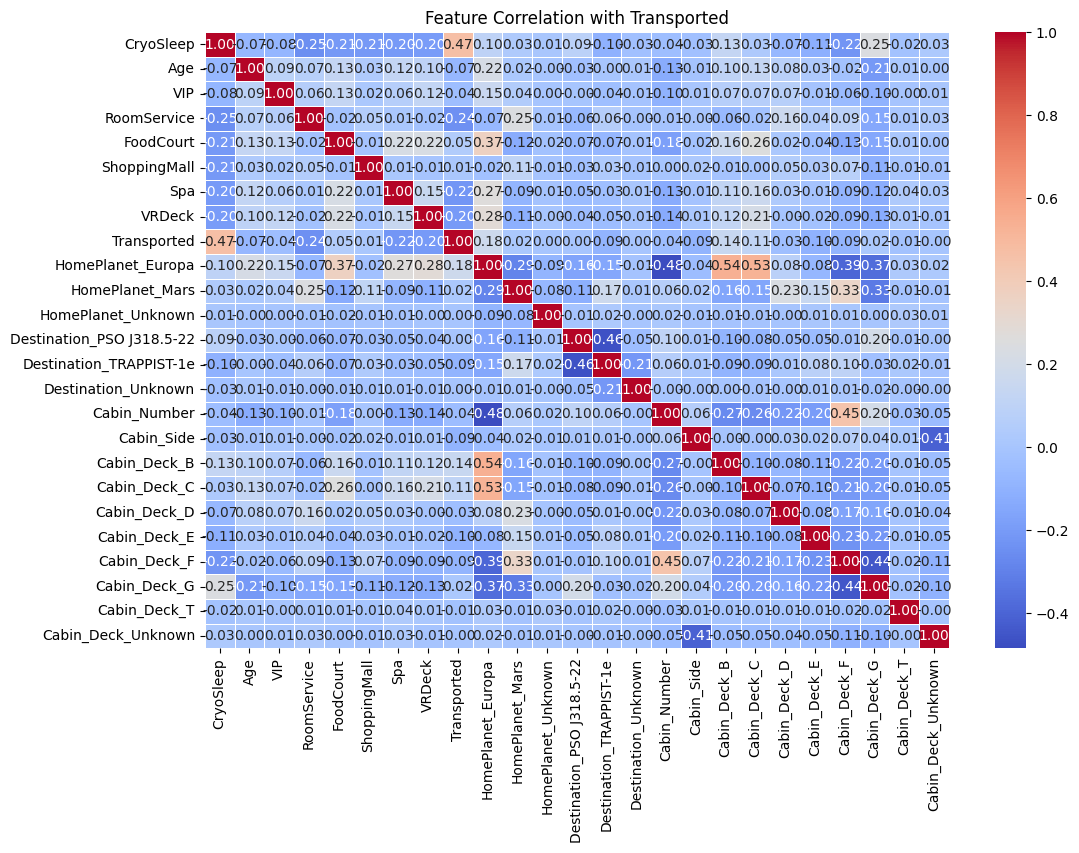

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Transported")
plt.show()


Find Features Most Correlated with Transported
Instead of looking at the entire heatmap, focus only on Transported:

In [54]:
import pandas as pd

# Compute correlation with Transported
correlation = df.corr()["Transported"].sort_values(ascending=False)

# Show the top correlated features
print(correlation)


Transported                  1.000000
CryoSleep                    0.468645
HomePlanet_Europa            0.176916
Cabin_Deck_B                 0.144733
Cabin_Deck_C                 0.108193
FoodCourt                    0.045583
HomePlanet_Mars              0.019544
Cabin_Deck_G                 0.016269
ShoppingMall                 0.009391
HomePlanet_Unknown           0.002712
Destination_Unknown          0.000547
Destination_PSO J318.5-22    0.000092
Cabin_Deck_Unknown          -0.000340
Cabin_Deck_T                -0.014568
Cabin_Deck_D                -0.034046
VIP                         -0.037650
Cabin_Number                -0.044502
Age                         -0.074233
Cabin_Deck_F                -0.087753
Cabin_Side                  -0.093319
Destination_TRAPPIST-1e     -0.094700
Cabin_Deck_E                -0.097965
VRDeck                      -0.204874
Spa                         -0.218545
RoomService                 -0.241124
Name: Transported, dtype: float64


Select Strongly Correlated Features
To decide which features to keep, follow this rule:

Strong correlation: |correlation| ≥ 0.2 → Keep these features ✅
Weak correlation: |correlation| < 0.2 → Remove these features ❌
Your strong features are:

✅ Keep these features (|correlation| ≥ 0.2):

CryoSleep (0.424)
VRDeck (-0.204)
Spa (-0.218)
RoomService (-0.241)
❌ Drop these weak features (|correlation| < 0.2):

HomePlanet_Europa (0.176)
Cabin_Deck_B (0.144)
Cabin_Deck_C (0.108)
FoodCourt (0.045)
HomePlanet_Mars (0.019)
... (All other values below ±0.2)
✅ Step 2.2: Drop Weak Features from Dataset
Now, let's remove weak features and keep only the most relevant ones:

Exclude Transported and Check Feature Importance
You’ll only consider the features that might influence Transported (the ones that are not the target). Here's the updated process:

Compute the correlation between input features and the target Transported.
Exclude Transported itself from the feature list.

In [55]:
# List of features (excluding target 'Transported')
input_features = df.drop(columns=["Transported"]).columns

# Compute correlation with Transported
correlation = df[input_features].corrwith(df["Transported"]).sort_values(ascending=False)

# Select strongly correlated features (|correlation| >= 0.2)
strong_features = correlation[abs(correlation) >= 0.2].index.tolist()

# Display selected features
print("Strong Features:", strong_features)



Strong Features: ['CryoSleep', 'VRDeck', 'Spa', 'RoomService']


Removing Multicollinearity
What it is: Multicollinearity occurs when two or more features are highly correlated with each other, which can affect the performance of some machine learning models.
How to check: You already computed the correlation matrix, so the next step is to check if any features are highly correlated (correlation above 0.8 or 0.9). If so, remove one feature of each pair with high correlation.
Action:
For features with a correlation above 0.8, you may want to drop one feature from each correlated pair.

In [56]:
# Correlation matrix for selected features
strong_features = ['CryoSleep', 'VRDeck', 'Spa', 'RoomService']
corr_matrix = df[strong_features].corr()
print(corr_matrix)



             CryoSleep    VRDeck       Spa  RoomService
CryoSleep     1.000000 -0.196427 -0.201744    -0.249669
VRDeck       -0.196427  1.000000  0.147658    -0.018624
Spa          -0.201744  0.147658  1.000000     0.009244
RoomService  -0.249669 -0.018624  0.009244     1.000000


Checking for Outliers
What it is: Outliers are extreme values in your data that might distort the performance of machine learning models.
How to check: Use statistical methods like box plots, Z-scores, or the IQR (Interquartile Range) method to identify and remove or handle outliers.
Action:
You can use box plots to visually inspect for outliers or the IQR method to find and handle outliers. For example:

In [57]:
# Check outliers using IQR for each feature
for feature in strong_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data based on these bounds
    df_cleaned = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]



Scaling/Normalization
Apply scaling or normalization to the selected features if they are numeric and have a wide range. Since features like 'CryoSleep' are binary (True/False), you don't need to scale them. But features like 'VRDeck', 'Spa', and 'RoomService' might benefit from scaling if you're using models like k-NN, SVM, or Logistic Regression.

In [58]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the numeric features
scaler = StandardScaler()
df[['VRDeck', 'Spa', 'RoomService']] = scaler.fit_transform(df[['VRDeck', 'Spa', 'RoomService']])


Split Your Data:
You should split the data into training and testing datasets. Usually, this is done using an 80-20 split or 70-30 split.

In [59]:
from sklearn.model_selection import train_test_split

# Select only the strong features
X = df[['CryoSleep', 'VRDeck', 'Spa', 'RoomService']]  # Features
y = df['Transported']  # Target

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
!pip install --upgrade scikit-learn xgboost


Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7452558941920644
Confusion Matrix:
 [[577 284]
 [159 719]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72       861
           1       0.72      0.82      0.76       878

    accuracy                           0.75      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.75      0.74      1739



XG Boost

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7573317998849913
Confusion Matrix:
 [[586 275]
 [147 731]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74       861
           1       0.73      0.83      0.78       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [66]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Handle missing values
imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_train_filled = imputer.fit_transform(X_train)
X_test_filled = imputer.transform(X_test)

# Step 2: Initialize Logistic Regression model
log_reg = LogisticRegression()

# Step 3: Train Logistic Regression model on filled data
log_reg.fit(X_train_filled, y_train)

# Step 4: Predict on test data
y_pred_log = log_reg.predict(X_test_filled)

# Step 5: Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression Accuracy: 0.7642323174238068
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       861
           1       0.75      0.80      0.77       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Handle Missing Values
imputer = SimpleImputer(strategy="mean")  # Fill NaNs with column mean
X_train_filled = imputer.fit_transform(X_train)
X_test_filled = imputer.transform(X_test)

# Step 2: Apply Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)  # Generate interaction terms
X_train_poly = poly.fit_transform(X_train_filled)
X_test_poly = poly.transform(X_test_filled)

# Step 3: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Step 4: Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)  # Increase iterations for better convergence
log_reg.fit(X_train_scaled, y_train)

# Step 5: Predict on test data
y_pred_log_poly = log_reg.predict(X_test_scaled)

# Step 6: Evaluate the model
print("Logistic Regression with Polynomial Features Accuracy:", accuracy_score(y_test, y_pred_log_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_log_poly))


Logistic Regression with Polynomial Features Accuracy: 0.7636572742955722
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       861
           1       0.75      0.80      0.77       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



Hyperparameter Tuning:
Both Random Forest and XGBoost benefit significantly from hyperparameter tuning. Try using GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your models.
Random Forest Hyperparameter Tuning Example:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)

# Train the model
rf_best.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy of the best Random Forest model:", accuracy_score(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))


Accuracy of the best Random Forest model: 0.7636572742955722
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.74       861
           1       0.74      0.83      0.78       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the strong features
strong_features = ['CryoSleep', 'VRDeck', 'Spa', 'RoomService']

# Prepare the data with selected features
X = df[strong_features]
y = df['Transported']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_clf.fit(X_train, y_train)

# Predict the target on the test set
y_pred = dt_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


Decision Tree Accuracy: 72.80%


neural network normal check

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X contains the strong features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier (Multi-Layer Perceptron)
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = mlp_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy * 100:.2f}%")


ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

nn updated form

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


In [ ]:

def build_nn(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),  # Dropout layer to prevent overfitting
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



In [ ]:
# Assuming X_train_strong, X_test_strong, y_train, y_test are already defined
model_strong = build_nn(X_train_strong.shape[1])
model_strong.fit(X_train_strong, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_strong = (model_strong.predict(X_test_strong) > 0.5).astype(int)
accuracy_strong = accuracy_score(y_test, y_pred_strong)
print("Neural Network Accuracy (Strong Features):", accuracy_strong)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4937 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4928 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4967 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4996 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4965 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4891 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4972 - loss: nan - val_accuracy: 0.5004 - val_loss: nan
Epoch 9/30
174/174 ━━━━━

so tuning nn is not helping, now we will apply stacking of best models

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the base models (Random Forest, Logistic Regression, Neural Network)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Define the meta-model (Logistic Regression, you can change it if needed)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('nn', nn)],
    final_estimator=meta_model,
    n_jobs=-1
)

# Split your data (Assuming X and y are your feature matrix and target vector)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.7608


so move with just random forest.

              precision    recall  f1-score   support

       False       0.80      0.70      0.74       861
        True       0.74      0.83      0.78       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739

Confusion Matrix:
 [[600 261]
 [150 728]]


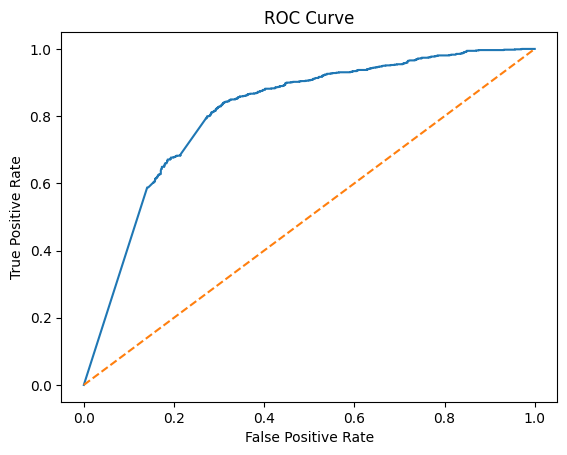

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions on test data
y_pred = rf_best.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the training and test data
train_data = pd.read_csv('/content/train.csv')  # Adjust path as needed
test_data = pd.read_csv('/content/test.csv')  # Adjust path as needed

# Assuming you've selected the best features based on your previous analysis
best_features = ["CryoSleep", "VRDeck", "Spa", "RoomService"]  # Replace with your actual best features

# Preprocess the train and test data (apply the same transformations to both)
X_train = pd.get_dummies(train_data[best_features])  # Apply pd.get_dummies() for training data
X_test = pd.get_dummies(test_data[best_features])  # Apply pd.get_dummies() for test data

# Align the columns of X_test with X_train to ensure they match
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Target variable (assuming 'Transported' is the target in your dataset)
y_train = train_data["Transported"]

# Initialize Random Forest with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)

# Train the model on the training data
rf_best.fit(X_train, y_train)

# Predict on the test data
y_pred_rf_best = rf_best.predict(X_test)

# Save the predictions in the required format
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': y_pred_rf_best})

# Save the output to a CSV file for submission
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")



Your submission was successfully saved!
